In [2]:
from pathlib import Path

import numpy as np

from lagom.experiment import Configurator

from lagom.utils import pickle_load

from lagom.vis import CurvePlot

In [3]:
log_folder = Path('logs')

list_config = pickle_load(log_folder/'configs.pkl')
configs = Configurator.to_dataframe(list_config)
configs

,ID,cuda,env.id,env.standardize,network.recurrent,network.hidden_size,es.algo,es.popsize,es.mu0,es.std0,train.num_iteration,train.N,log.print_interval,log.dir
0,0,True,Pendulum-v0,False,False,[32],CMAES,64,0.0,0.5,5000,5,100,logs


In [4]:
def load_results(log_folder, ID):
    p = Path(log_folder)/str(ID)
    
    list_result = []
    for sub in p.iterdir():
        if sub.is_dir() and (sub/'result.pkl').exists():  # seed directories
            list_result.append(pickle_load(sub/'result.pkl'))
            
    return list_result


def get_returns(list_result):
    returns = []
    for result in list_result:
        returns.append(result['best_return'])
        
    return returns

In [5]:
list_result = load_results('logs/', 0)
returns = get_returns(list_result)
returns = np.asarray(returns)[:, ::1]

env_id = configs.iloc[0]['env.id']

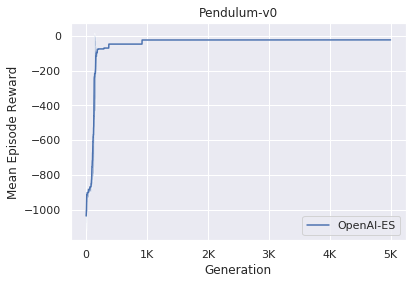

In [6]:
plot = CurvePlot()
plot.add('OpenAI-ES', returns)
ax = plot(title=env_id, 
          xlabel='Generation', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

In [33]:
ax.figure.savefig(f'data/{env_id}.png')